In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')

In [367]:
answer_meta = pd.read_csv('data/metadata/answer_metadata_task_3_4.csv')

In [368]:
new_df = data.merge(answer_meta, on='AnswerId', how='left')
notnull_confidence = new_df[new_df['Confidence'].notnull()]

notnull_confidence

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
1,767,3062,55638,1,3,3,2019-10-27 20:54:00.000,25.0,115,39,52562.0
6,932,3923,6545,0,4,3,2019-10-02 16:20:00.000,25.0,112,57,52562.0
12,405,1506,1268566,1,2,2,2019-12-19 18:24:00.000,100.0,210,64,52562.0
13,78,944,85177,1,3,3,2020-01-27 16:50:00.000,100.0,53,30,NaN
16,11,5482,648990,0,2,3,2019-11-24 16:20:00.000,50.0,95,109,52562.0
...,...,...,...,...,...,...,...,...,...,...,...
1382705,222,1048,185768,0,4,3,2019-10-08 16:21:00.000,50.0,260,18,52562.0
1382707,596,5579,387573,0,2,1,2019-10-23 13:39:00.000,25.0,288,32,52562.0
1382709,276,2213,884965,0,4,3,2019-11-26 20:16:00.000,25.0,360,62,52562.0
1382712,300,4605,802606,0,4,3,2019-12-01 18:24:00.000,100.0,24,25,52562.0


In [369]:
grouped_data = new_df.groupby('QuestionId').agg(
    count = pd.NamedAgg(column='IsCorrect', aggfunc='count'),
                mean = pd.NamedAgg(column='IsCorrect', aggfunc='mean'),
                sem = pd.NamedAgg(column='IsCorrect', aggfunc='sem'),
                confidence=pd.NamedAgg(column='Confidence', aggfunc='mean')
            ).reset_index()

grouped_data.head()

,QuestionId,count,mean,sem,confidence
0,0,2812,0.443457,0.009370,66.176471
1,1,14,0.571429,0.137253,NaN
2,2,2313,0.385214,0.010121,66.201354
3,3,2672,0.808757,0.007610,85.021246
4,4,1704,0.401408,0.011878,59.343434


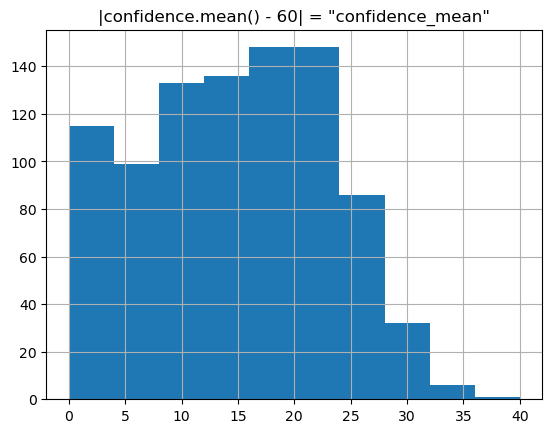

In [370]:
grouped_data['confidence_mean'] = abs(grouped_data['confidence'] - 60)

plt.title('|confidence.mean() - 60| = "confidence_mean"')
grouped_data['confidence_mean'].hist()
plt.show()

In [371]:
# sort by confidence - 80
csort = grouped_data.sort_values(by='confidence_mean', ascending=True)

csort.head(n=10)

,QuestionId,count,mean,sem,confidence,confidence_mean
61,61,78,0.230769,0.048014,60.000000,0.000000
873,873,2650,0.373208,0.009397,60.000000,0.000000
698,698,68,0.294118,0.055666,60.000000,0.000000
226,226,2105,0.383373,0.010600,59.979973,0.020027
181,181,574,0.318815,0.019468,59.890110,0.109890
594,594,1493,0.638312,0.012439,60.131988,0.131988
483,483,1473,0.378140,0.012639,60.140562,0.140562
437,437,1164,0.347079,0.013959,59.848485,0.151515
605,605,2581,0.271213,0.008753,59.757119,0.242881
329,329,166,0.277108,0.034843,59.722222,0.277778


In [372]:
csort['score'] = csort['confidence_mean'].rank(ascending=False)

confidence_sort = csort.sort_values(by='confidence_mean', ascending=False)

confidence_sort

,QuestionId,count,mean,sem,confidence,confidence_mean,score
315,315,9,0.777778,0.146986,100.000000,40.000000,1.0
548,548,10,0.400000,0.163299,25.000000,35.000000,2.5
940,940,72,0.527778,0.059247,95.000000,35.000000,2.5
562,562,110,0.454545,0.047693,94.444444,34.444444,4.0
924,924,2379,0.923497,0.005451,93.435155,33.435155,5.0
...,...,...,...,...,...,...,...
847,847,4,1.000000,0.000000,NaN,NaN,NaN
860,860,15,0.466667,0.133333,NaN,NaN,NaN
897,897,9,0.444444,0.175682,NaN,NaN,NaN
905,905,5,0.400000,0.244949,NaN,NaN,NaN


## public data

In [373]:
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')

eval_validation['1count'] = (eval_validation[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 1).sum(axis=1)
eval_validation['2count'] = (eval_validation[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 2).sum(axis=1)

eval_validation = eval_validation[['left', 'right', '1count', '2count']]

eval_validation.head()

,left,right,1count,2count
0,909,318,1,4
1,285,609,0,5
2,132,271,2,3
3,704,127,1,4
4,16,586,2,3


In [374]:
question_ids = [909, 285, 132, 704, 16, 56, 233, 877, 246, 668, 691, 403, 404, 202, 555, 527, 225, 316, 363, 118, 676, 527, 327, 158, 547, 318, 609, 271, 127, 586, 865, 478, 620, 733, 741, 4, 830, 27, 761, 815, 876, 558, 121, 780, 116, 153, 129, 721, 139, 578]

# Filter only rows that contain QuestionId among given values
filtered_df = csort[grouped_data['QuestionId'].isin(question_ids)]

filtered_df.to_csv('public.csv', index=False)
filtered_df = filtered_df[['QuestionId', 'mean', 'score', 'count', 'confidence']]

/var/folders/lj/48d1s0dd7075xmf0jvv698q00000gn/T/ipykernel_56216/1997386008.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = csort[grouped_data['QuestionId'].isin(question_ids)]


In [375]:
eval_validation['L_score'] = eval_validation['left'].map(filtered_df.set_index('QuestionId')['score'])
eval_validation['R_score'] = eval_validation['right'].map(filtered_df.set_index('QuestionId')['score'])
eval_validation['L_count'] = eval_validation['left'].map(filtered_df.set_index('QuestionId')['count'])
eval_validation['R_count'] = eval_validation['right'].map(filtered_df.set_index('QuestionId')['count'])
eval_validation['L_confidence'] = eval_validation['left'].map(filtered_df.set_index('QuestionId')['confidence'])
eval_validation['R_confidence'] = eval_validation['right'].map(filtered_df.set_index('QuestionId')['confidence'])
eval_validation['L_mean'] = eval_validation['left'].map(filtered_df.set_index('QuestionId')['mean'])
eval_validation['R_mean'] = eval_validation['right'].map(filtered_df.set_index('QuestionId')['mean'])

# If 2count is greater, the value of public is 1
eval_validation['public'] = (eval_validation['2count'] > eval_validation['1count']).astype(int)
# If the size of right_score is larger, the value of trian is 1
eval_validation['train'] = (eval_validation['R_score'] > eval_validation['L_score']).astype(int)


eval_validation

,left,right,1count,2count,L_score,R_score,L_count,R_count,L_confidence,R_confidence,L_mean,R_mean,public,train
0,909,318,1,4,832.0,885.0,81,78,57.692308,59.375000,0.530864,0.512821,1,1
1,285,609,0,5,545.0,465.0,2361,1595,72.151163,74.909091,0.651419,0.452665,1,0
2,132,271,2,3,498.0,823.0,851,911,73.653846,57.352941,0.387779,0.387486,1,1
3,704,127,1,4,471.0,217.0,1723,109,74.769939,81.666667,0.577481,0.431193,1,0
4,16,586,2,3,127.0,636.0,2300,1698,83.974359,69.561688,0.583478,0.246761,1,1
5,56,865,1,4,265.0,604.0,2614,585,80.238589,70.547945,0.516450,0.297436,1,1
6,233,478,4,1,775.0,381.0,2606,193,64.595170,76.973684,0.490023,0.601036,0,0
7,877,620,0,5,703.0,789.0,1581,846,67.350746,64.075630,0.514231,0.423168,1,1
8,246,733,4,1,181.0,9.5,1265,85,82.346491,90.909091,0.309091,0.847059,0,0
9,668,741,5,0,249.0,76.0,2934,637,80.719237,85.860656,0.720177,0.711146,0,0


## Ranking

In [376]:
confidence_sort['rank'] = confidence_sort['score'].rank(ascending=False)

result = confidence_sort.sort_values('rank', ascending=True)

result['rank'] = range(1, len(result) + 1)

result

,QuestionId,count,mean,sem,confidence,confidence_mean,score,rank
61,61,78,0.230769,0.048014,60.000000,0.000000,903.0,1
873,873,2650,0.373208,0.009397,60.000000,0.000000,903.0,2
698,698,68,0.294118,0.055666,60.000000,0.000000,903.0,3
226,226,2105,0.383373,0.010600,59.979973,0.020027,901.0,4
181,181,574,0.318815,0.019468,59.890110,0.109890,900.0,5
...,...,...,...,...,...,...,...,...
847,847,4,1.000000,0.000000,NaN,NaN,NaN,944
860,860,15,0.466667,0.133333,NaN,NaN,NaN,945
897,897,9,0.444444,0.175682,NaN,NaN,NaN,946
905,905,5,0.400000,0.244949,NaN,NaN,NaN,947


In [377]:
template = pd.read_csv('submission/template.csv')
template.head()

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [378]:
df1 = result
df2 = template

merged_df = pd.merge(df2, df1[['QuestionId', 'rank']], on='QuestionId', how='left')
merged_df = merged_df.drop('ranking', axis=1)
merged_df = merged_df.rename(columns={'rank': 'ranking'})

merged_df

,QuestionId,ranking
0,0,169
1,1,905
2,2,173
3,3,810
4,4,23
...,...,...
943,943,770
944,944,276
945,945,363
946,946,352


In [379]:
merged_df.to_csv('20192665_final.csv', index=False)

## Test
by private

In [380]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


In [381]:
eval_test['1count'] = (eval_test[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 1).sum(axis=1)
eval_test['2count'] = (eval_test[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 2).sum(axis=1)

eval_test.head(5)

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,1count,2count
0,15,15,145,762,2,2,2,2.0,2,0,5
1,31,31,307,208,1,1,1,2.0,1,4,1
2,25,25,278,195,1,1,1,1.0,1,5,0
3,3,3,13,153,2,2,2,2.0,2,0,5
4,40,40,23,100,2,1,1,1.0,1,4,1


<AxesSubplot:>

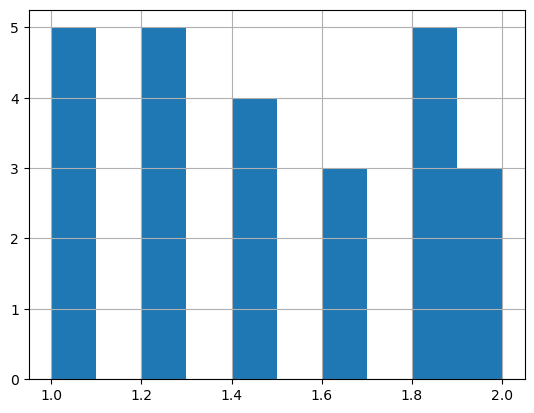

In [382]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

In [383]:
test_preference = []

for idx in range(len(eval_test)):
    if eval_test['1count'][idx] > eval_test['2count'][idx]:
        test_preference.append(1)
    
    else :
        test_preference.append(2)

test_preference

[2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2]

In [384]:
def preference(truth):
    left = list(truth.left)
    right = list(truth.right)
    
    truth_left = []
    truth_right = []
    truth_preference = []
    
    for idx in range(len(left)):
        truth_left.append(left[idx])
        truth_right.append(right[idx])

In [385]:
submission = pd.read_csv('20192665.csv')

submission.head()

,QuestionId,ranking
0,0,169
1,1,905
2,2,173
3,3,810
4,4,23


In [386]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    return submission_preference
    
submission_preference = evaluate(eval_test, submission)

In [387]:
submission_preference

[2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1]

<AxesSubplot:>

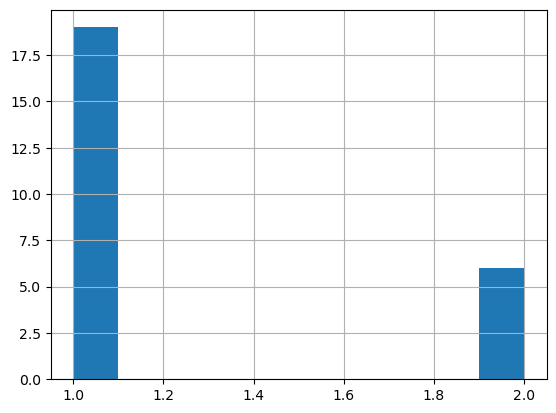

In [388]:
submission_df = pd.DataFrame({'score': submission_preference})
submission_df['score'].hist()

<AxesSubplot:>

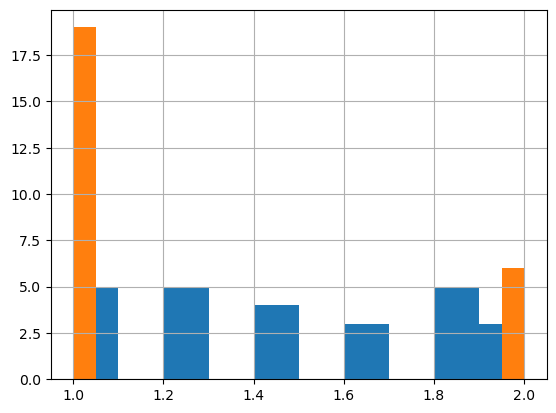

In [389]:
eval_test['score'].hist()
submission_df['score'].hist(bins=20)

In [390]:
count = 0

for i in range(len(test_preference)):
    if test_preference[i] == submission_preference[i]:
        count += 1

print("전문가 의견과 내 모델의 일치율은", int(count/25 * 100), "% 입니다.")


전문가 의견과 내 모델의 일치율은 56 % 입니다.


In [391]:
count

14

In [392]:
result_df = pd.DataFrame({'test_preference': test_preference, 'submission_preference': submission_preference})

result_df['compare'] = (result_df['test_preference'] == result_df['submission_preference']).astype(int)

result_df

,test_preference,submission_preference,compare
0,2,2,1
1,1,1,1
2,1,1,1
3,2,1,0
4,1,1,1
5,1,1,1
6,1,2,0
7,1,1,1
8,1,1,1
9,2,1,0


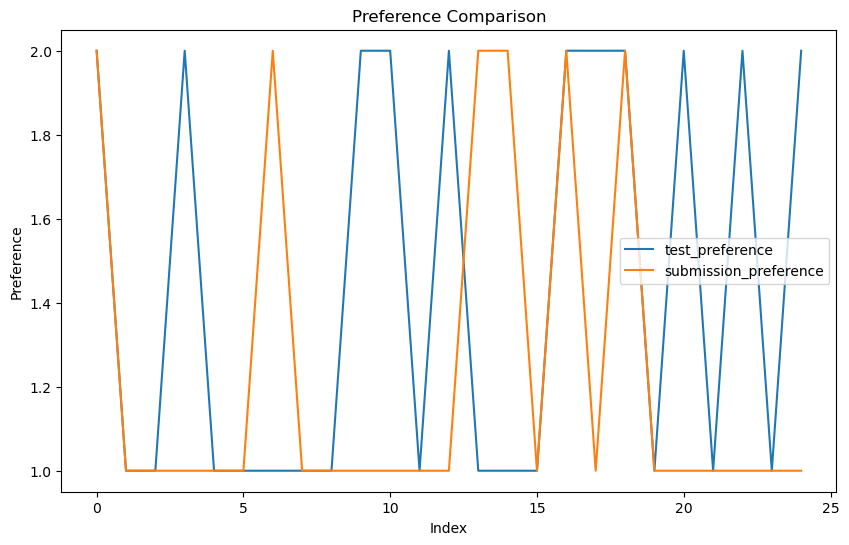

In [393]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(result_df.index, result_df['test_preference'], label='test_preference')
plt.plot(result_df.index, result_df['submission_preference'], label='submission_preference')

plt.title('Preference Comparison')
plt.xlabel('Index')
plt.ylabel('Preference')

plt.legend()

plt.show()